In [4]:
# 03/02/2025
# CONTROLLER
###################

from ipynb.fs.full.MLmodels import runModels
from ipynb.fs.full.preprocessing import dataPreProcessing


def controller(
    inFile = "../data/data2.csv", setNum = 1, inputDF = None, procs = ["clean", "predMap", "CFS", "splitSet", "debiasing"], 
    k = 10, tauRed = 0.8, inTestSize = 0.2, debiasingMode = "smote", run = True
):
  returnData = {}
  vars = dataPreProcessing(
      dsFile = inFile, Dset = setNum, df = inputDF, processes = procs, kFeatures = k, tauRedundancy = tauRed, testSize = inTestSize, debiasTechnique  = debiasingMode
  );
  df = vars["df"]
  if run and "splitSet" in procs:
    [Ypreds, models] = runModels(vars["Xtrain"], vars["Ytrain"], vars["Xtest"], modes = ["train", "test"])
    vars["Ypreds"] = Ypreds
    vars["models"] = models
  return vars

#vars = controller("../data/data2", setNum = 2, inputDF = None, procs = ["clean", "predMap", "CFS", "splitSet", "debiasing"], k = 6, tauRed = 0.8, inTestSize = 0.2, debiasingMode = "over", run = True);
#Xtrain = vars["Xtrain"]
#Ytrain = vars["Ytrain"]
#Xtest = vars["Xtest"]
#Ytest = vars["Ytest"]

In [5]:
import pandas as pd
def replaceColNames(colNames: list, data, labels: list) -> pd.DataFrame:
  # If data is a DataFrame, use iloc for slicing
  if isinstance(data, pd.DataFrame):
    # Here, data.iloc[:] returns the entire DataFrame
    data = data.iloc[:].to_numpy()  # Or you could work with data.iloc[:] directly
  if len(colNames) != data.shape[1]:
    raise Exception("Number of column names should be equal to number of columns in data.")
  df = pd.DataFrame(
    data = data,
    index = [i for i in range(data.shape[0])],
    columns = [colNames[i] for i in range(data.shape[1])]
  )
  df["diagnosis"] = labels
  return df

In [ ]:
# 03/02/2025
# CONTROLLER - DOMAIN ADAPTED DATASET
###################

from ipynb.fs.full.MLmodels import runModels
from ipynb.fs.full.preprocessing import dataPreProcessing
from ipynb.fs.full.domainAdaptation import convToDF


def controllerDA(
    sourceFile = "../data/data1Encoded", targetFile = "../data/data2", sourceDF = None, targetDF = None, 
    procsSource = ["clean", "predMap", "debiasing", "centreMean", "splitSet"], procsTarget = ["clean", "predMap", "debiasing", "centreMean", "splitSet"], k = 10, tauRed = 0.8, 
    debiasingMode = "smote", run = True
):
  vars = {}
  varsSource = dataPreProcessing(dsFile = sourceFile, Dset = 1, df = sourceDF, processes = procsSource, debiasTechnique = debiasingMode, testSize = 0.0, kFeatures = k, tauRedundancy = tauRed)
  varsTarget = dataPreProcessing(dsFile = targetFile, Dset = 2, df = targetDF, processes = procsTarget, debiasTechnique = debiasingMode, testSize = 0.0)
  sourceX, sourceY, targetX, targetY = varsSource["X"], varsSource["Y"], varsTarget["X"], varsTarget["Y"]
  """
  # USED FOR NO DOMAIN ADAPTATION (TO TEST TRANSFER LEARNING)
  sourceX["diagnosis"], targetX["diagnosis"] = sourceY, targetY
  dfS, dfT = sourceX, targetX

  dfSLabels = dfS["diagnosis"]
  dfS = dfS.drop("diagnosis", axis = 1)
  names = dfT.columns.to_list()
  names.pop()
  dfS = replaceColNames(colNames = names, data = dfS, labels = dfSLabels) # essentially just renaming the feature names
  sourceY = dfS["diagnosis"]
  dfS.drop("diagnosis", axis = 1)
  """
  if run:
    [Ypreds, models] = runModels(sourceX, sourceY, targetX, modes = ["train", "test"])
    #print(Ypreds)
    vars["Ypreds"] = Ypreds
    vars["models"] = models
  return [varsSource, varsTarget, vars]

# FOR DOMAIN ADAPTATION:
varsSource, varsTarget, vars = controllerDA(procsSource = ["splitSet"], procsTarget = ["clean", "predMap", "splitSet", "centreMean"], k = 6, tauRed = 0.8, run = True);
# FOR NO DOMAIN ADAPTATION:
#varsSource, varsTarget, vars = controllerDA(
#  sourceFile = "../data/data", procsSource = ["clean", "predMap", "CFS", "splitSet"], 
#  procsTarget = ["clean", "predMap", "splitSet"], k = 6, tauRed = 0.8, run = True, 
#  debiasingMode = "adasyn"
#);


Xtrain = varsSource["X"]
Ytrain = varsSource["Y"]
Xtest = varsTarget["X"]
Ytest = varsTarget["Y"]
print(vars["models"])

Number of NANs in data set 1 : id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_

/home/saatvikk/uni_ug/year3/bigboiproject/src/preprocessing.ipynb:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  "\n",


Number of NANs in data set 2 : Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
Preparing to interpolate NANs...
Number of NANs now:  Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
DEBIASING USING: adasyn
1: 10925 rows
0: 10923 rows


/home/saatvikk/uni_ug/year3/bigboiproject/src/preprocessing.ipynb:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  "\n",


Number of NANs in data set 2 : Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
Preparing to interpolate NANs...
Number of NANs now:  Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
DEBIASING USING: smote
0: 10923 rows
1: 10923 rows


/home/saatvikk/uni_ug/year3/bigboiproject/src/preprocessing.ipynb:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  "\n",


{'Ypred_regModel': 'training complete', 'Ypred_svmModel': 'training complete', 'Ypred_nbcModel': 'training complete', 'Ypred_knnModel': 'training complete', 'Ypred_dtModel': 'training complete'}
{'regModel': <ipynb.fs.full.MLmodels.logReg object at 0x7fe283028580>, 'svmModel': <ipynb.fs.full.MLmodels.supVecMac object at 0x7fe283029cf0>, 'nbcModel': <ipynb.fs.full.MLmodels.naiBayClass object at 0x7fe28302a590>, 'knnModel': <ipynb.fs.full.MLmodels.kNearNeigh object at 0x7fe28302b3d0>, 'dtModel': <ipynb.fs.full.MLmodels.decTree object at 0x7fe283029240>}


In [7]:
##################################

# EVALUATE MODELS

##################################

In [8]:
# 12/2024
# NORMAL PERFORMANCE METRICS
from ipynb.fs.full.performance import performanceEval

# logistic reg
print("============= LOGISTIC REGRESSION MODEL PERFORMANCE =============")
regMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_regModel"], "Logistic Regression model")
print(regMetrics)
print("=================================================================")

# svm (linear kernel)
print("============= SVM (LINEAR KERNEL) MODEL PERFORMANCE =============")
svmLinMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_svmModel"], "SVM (Linear Kernel) model")
print(svmLinMetrics)
print("=================================================================")

# NBC
print("============= NAIVE BAYES CLASSIFIER MODEL PERFORMANCE =============")
nbcMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_nbcModel"], "NBC model")
print(nbcMetrics)
print("=================================================================")

# K-NN
print("============= K-NN MODEL MODEL PERFORMANCE =============")
knnMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_knnModel"], "K-NN model")
print(knnMetrics)
print("=================================================================")

# Decision Tree
print("============= DECISION TREE MODEL PERFORMANCE =============")
decTreeMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_dtModel"], "K-NN model")
print(decTreeMetrics)
print("=================================================================")

============= LOGISTIC REGRESSION MODEL PERFORMANCE =============
Logistic Regression model  accuracy (in %): 60.89902041563673
Predicted      0     1    All
Actual                       
0           8575  2348  10923
1           6194  4729  10923
All        14769  7077  21846
{'accuracy': 60.89902041563673, 'specificity': 78.50407397235192, 'sensitivity': 43.29396685892154, 'recall': 43.29396685892154, 'precision': 66.82209975978523}
============= SVM (LINEAR KERNEL) MODEL PERFORMANCE =============
SVM (Linear Kernel) model  accuracy (in %): 62.66593426714273
Predicted      0     1    All
Actual                       
0           8593  2330  10923
1           5826  5097  10923
All        14419  7427  21846
{'accuracy': 62.66593426714273, 'specificity': 78.66886386523849, 'sensitivity': 46.66300466904696, 'recall': 46.66300466904696, 'precision': 68.62797899555675}
============= NAIVE BAYES CLASSIFIER MODEL PERFORMANCE =============
NBC model  accuracy (in %): 56.582440721413526
Predic

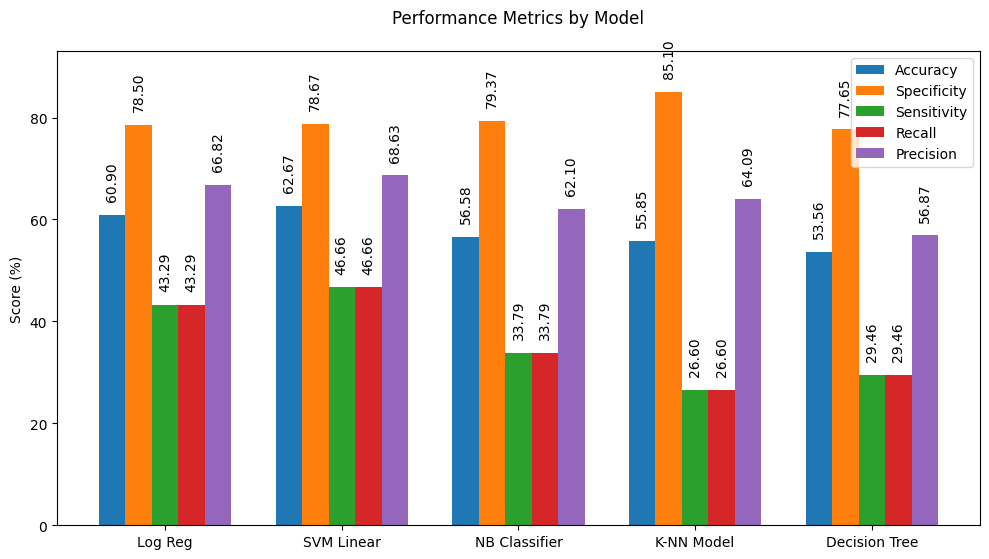

In [9]:
# 03/02/2025
import numpy as np
import matplotlib.pyplot as plt

# Bar Chart of Perf Metrics
modelNames = ["Log Reg", "SVM Linear", "NB Classifier", "K-NN Model", "Decision Tree"]
modelMetrics = [regMetrics, svmLinMetrics, nbcMetrics, knnMetrics, decTreeMetrics]
acc, spec, sen, rec, prec = [], [], [], [], []

# Extract metrics for each model
for metrics in modelMetrics:
    acc.append(metrics["accuracy"])
    spec.append(metrics["specificity"])
    sen.append(metrics["sensitivity"])
    rec.append(metrics["recall"])
    prec.append(metrics["precision"])

# Set up positions for grouped bars
x = np.arange(len(modelNames))  # Label locations for each model
width = 0.15                    # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
rects1 = ax.bar(x - 2 * width, acc, width, label="Accuracy")
rects2 = ax.bar(x - width, spec, width, label="Specificity")
rects3 = ax.bar(x, sen, width, label="Sensitivity")
rects4 = ax.bar(x + width, rec, width, label="Recall")
rects5 = ax.bar(x + 2 * width, prec, width, label="Precision")

# Find the maximum metric value to set the top margin
y_max = max(acc + spec + sen + rec + prec)
ax.set_ylim(0, y_max + 8)  # Increase the limit more so the labels don't hit the title

# Add labels, title, and custom x-axis tick labels, etc.
# The "pad" parameter moves the title further above the plot
ax.set_title('Performance Metrics by Model', pad=20)
ax.set_ylabel('Score (%)')
ax.set_xticks(x)
ax.set_xticklabels(modelNames)
ax.legend()

# Function to add labels above each bar with vertical text
def autolabel(rects):
    """Attach a vertically rotated text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),          # Increase offset to 10 points above the bar
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90,
                    clip_on=False)

# Label each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Make room for the labels by adjusting the layout,
# and add a bit more space above if needed:
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [10]:
##################################

# best k so far = 6 (w tauRed = 0.8) (FOR DATA SET 1)
# best k so far = 6 (w tauRed = 0.8) (FOR DATA SET 1)


##################################